In [8]:
import logomaker as lm

aligned_fasta:str = ""
with open("./157_22_2023-07-24-14-00-19.fasta.out", 'r') as handle :
    aligned_fasta = handle.readlines()


In [13]:
# get all sequences 
seqs = []
seq = ""
for line in aligned_fasta:
    if(line.startswith('>')):
        if(len(seq)>0):
            seqs.append(seq)
            seq = ""
        continue
    elif not ('#' in seq or '>' in seq):
        seq += line.strip()
seqs.append(seq)

#seqs = [seq.strip() for seq in aligned_fasta if( '#' not in seq) and ('>' not in seq)]

lens = [len(seq) for seq in seqs]
print(lens)

[617, 617, 617, 617, 617, 617, 617, 617]


In [49]:
seqs_100 = [seq[:100] for seq in seqs]

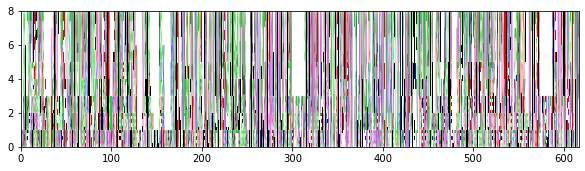

In [23]:
counts_mat = lm.alignment_to_matrix(sequences=seqs, to_type='counts', characters_to_ignore='-')
lm.Logo(counts_mat)

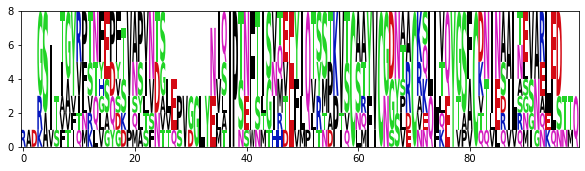

In [50]:
counts_mat = lm.alignment_to_matrix(sequences=seqs_100, to_type='counts', characters_to_ignore='-')
lm.Logo(counts_mat)

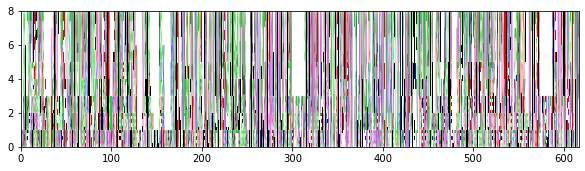

In [24]:
ww_counts_mat = lm.alignment_to_matrix(sequences=seqs, to_type='counts', characters_to_ignore='-')

num_seqs = ww_counts_mat.sum(axis=1)
pos_to_keep = num_seqs > len(seqs)/2
ww_counts_df = ww_counts_mat[pos_to_keep]
ww_counts_df.reset_index(drop=True, inplace=True)

lm.Logo(ww_counts_mat)

In [37]:
import seqlogo as logo
import pandas as pd

aligned_fasta:str = ""
with open("./157_22_2023-07-24-14-00-19.fasta.out", 'r') as handle :
    aligned_fasta = handle.readlines()

seqs = [seq.strip() for seq in aligned_fasta if( '#' not in seq) and ('>' not in seq)]

In [44]:
def alnSiteCompositionDF(aln:list, characters="ACDEFGHIKLMNPQRSTVWY"):
  alnRows = len(aln[0])
  compDict = {char:[0]*alnRows for char in characters}
  for seq in aln:
    for aaPos in range(len(seq)):
      aa = seq[aaPos]
      if aa in characters:
        compDict[aa][aaPos] += 1    
  return pd.DataFrame.from_dict(compDict)

In [45]:
DF_counts = alnSiteCompositionDF(seqs)
DF_probs = DF_counts.div(DF_counts.sum(axis=1), axis=0)


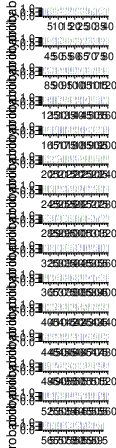

In [48]:
DF_logo = logo.Ppm(DF_probs,alphabet_type="AA")
logo.seqlogo(DF_logo, ic_scale = False, format = 'png', size = 'xlarge')
